# EE511 HW 3 
## Name: Royston Marian Mascarenhas


# Problem 1 : Area Estimation

In [174]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [175]:
class cartesian():
    def __init__(self, samples_no):
        self.xlst = np.random.uniform(0,1,samples_no);
        #print(self.xlst)
        self.ylst = np.random.uniform(0,1,samples_no);
    
    def returnlst(self):
        return self.xlst,self.ylst
    
    def gen_xy (self,n):
        return  (np.random.uniform(0,1,n), np.random.uniform(0,1,n))
    
    def compare(self,x,y):
        count = 0;
        for i in range(len(x)):
            if (x[i]**2 + y[i]**2 < 1):
                if (((x[i]-1)**2 + (y[i]-1)**2) < 1):
                    count = count + 1;
        return count;
    
    def area_estimate(self,count,total):
        return count/total;
    
    def compare_iter(self,k,sampl_no,hist_flag):
        estimate_lst = []
        for i in range(0,k):
            x,y = self.gen_xy(sampl_no)
            count = self.compare(x,y)
            area = self.area_estimate(count,sampl_no)
            estimate_lst.append(area)
        if(hist_flag==1):
            plt.hist(estimate_lst)
        return estimate_lst
            
                    

### Summary of Approach


The area consumed by the figure is the integral of the function representing the figure over that space.
Thus, we use monte carlo sampling to estimate the area numerically as the integral might be a complex function.


Class: cartesian() <br>
Methods: <br>
compare_iter(k,samp_np,hist_flag) -> count points which fall in the designated area over different iterations from compare() <br>
area_estimate(count,total) -> translates count in compare_iter to area estimate <br>
compare(self,x,y) -> count points which fall in the designated area <br>
gen_xy (self,n): -> populate samples taken from the uniform distribution <br>

Algorithm:
1. Generate samples from the uniform distribution 
2. Count whether they fall in the area 
3. Calculate the area estimate
4. Do this over 50 iterations
5. Mean of the areas is the area estimate. Note the veriance.


### Discussion of Results

In [176]:
n = 500
A = cartesian(n)
x,y = A.returnlst()
count = A.compare(x,y)
area = A.area_estimate(count,n)

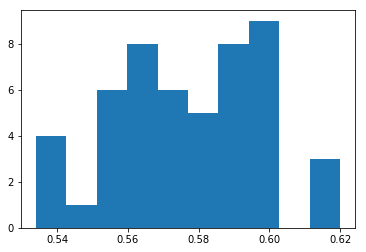

In [177]:
n = 500
k = 50
B = cartesian(n)
est = B.compare_iter(k,n,1)

In [178]:
count

292

In [179]:
area

0.584

In [180]:
k = 50
var_lst=[]
for i in tqdm(range(500,20000,500)):
    var_lst.append(np.var(B.compare_iter(k,i,0)));
x = range(500,20000,500)

Text(0,0.5,'variance')

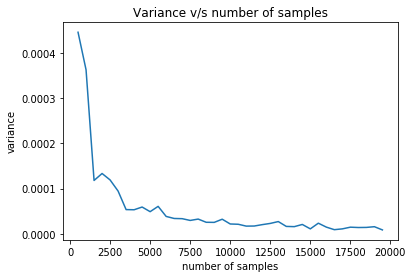

In [15]:
plt.plot(x,var_lst)
plt.title("Variance v/s number of samples")
plt.xlabel("number of samples")
plt.ylabel("variance")

In [17]:
var_lst #List of variances

[0.00044640159999999936,
 0.0003632099999999992,
 0.00011804728888888896,
 0.00013344999999999983,
 0.00011920390399999992,
 9.453582222222224e-05,
 5.3472653061224455e-05,
 5.3118400000000044e-05,
 5.914629135802472e-05,
 4.886425600000003e-05,
 6.063359999999996e-05,
 3.834026666666671e-05,
 3.38042035502958e-05,
 3.334694693877564e-05,
 2.945919999999998e-05,
 3.2456874999999996e-05,
 2.5365060207612464e-05,
 2.5135708641975245e-05,
 3.21666880886426e-05,
 2.160850000000003e-05,
 2.096695147392288e-05,
 1.6868879338842997e-05,
 1.706631077504726e-05,
 2.015223333333332e-05,
 2.2841077760000025e-05,
 2.694866035502958e-05,
 1.621091906721538e-05,
 1.569821428571431e-05,
 2.0541572413793023e-05,
 1.0786504888888901e-05,
 2.3363356503642037e-05,
 1.465289999999998e-05,
 8.983425528007259e-06,
 1.077351418685124e-05,
 1.450843559183674e-05,
 1.377052469135804e-05,
 1.3990578816654506e-05,
 1.557121440443212e-05,
 8.449056147271531e-06]

>Discussion:<br>

- The average is found to be 0.584 which implies that approximately 58% of the unit square is occupied by the figure <br>
- The histogram of area estimates is used to deduce the range in which the area estimates vary <br>
- As we increase the number of samples, the variance reduces as a stronger estimate is obtained <br>
- As we can observe from the variance, the estimate given by the monte carlo methods is almost accurate <br>
- The accuracy increases with increase in number of samples <br>
- However, increase in number of samples might result in a longer run time <br>
- To combat this, we can use variance reduction strategies <br>

# Problem 2 : Monte Carlo Integration w. Variance Reduction Strategies

In [123]:
class monte_carlo_estimator:
    def __init__ (self,N,k,u1,u2):
        self.N = N #number of samples required 
        self.k=k #number of estimates to be obtained
        self.u1=u1 #lower interval 
        self.u2=u2 #upper interval
        
    def populate(self):
        return np.random.uniform(self.u1,self.u2,self.N);
    
    def fx(self,fx_no,x,y=0):
        if fx_no == 1:
            return (1/(1 + (np.sinh(2*x)*np.log(x))))
        if fx_no == 2:
            return (np.exp(-(x**4)-(y**4))) 
        '''if fx_no == 1:
            return [1/(1 + (np.sinh(2*x)*np.log(x))) for x in xlist]
        if fx_no == 2:
            lst = []
            for i in range(0,len(x_list)):
                lst.append(exp(-(x[i]**4)-(y[i]**4))) 
            return lst'''
    
    #def estimate(self,fx_no,x_list,y_list=[]):
    def estimate(self,fx_no):
            if fx_no == 1:
                est_list=[]
                var_list=[]
                err_list=[]
                for z in tqdm(range(0,self.k)):
                    x_list = self.populate()
                    count = 0
                    count_sosq = 0
                    for i in range(0,self.N):
                        count += self.fx(1,x_list[i])
                        count_sosq += np.square(self.fx(1,x_list[i]))
                    est_list.append(((self.u2-self.u1)/self.N)* count)
                    var_list.append((((self.u2-self.u1)/self.N)* count_sosq) - np.square(est_list[z]))
                    err_list.append(var_list[z]/self.N)
            if fx_no == 2:
                est_list=[]
                var_list=[]
                err_list=[]
                for z in tqdm(range(0,self.k)):
                    x_list = self.populate()
                    y_list = self.populate()
                    count = 0
                    count_sosq = 0
                    for i in range(0,self.N):
                        count += self.fx(2,x_list[i],y_list[i])
                        count_sosq += np.square(self.fx(2,x_list[i]))
                    est_list.append(((np.square(self.u2-self.u1))/self.N)* count)
                    #var_list.append((((self.u2-self.u1)/self.N)* count_sosq) - np.square(est_list[z]))
                    var_list.append((((np.square(self.u2-self.u1))/self.N)* count_sosq) - np.square(est_list[z]))
                    err_list.append(var_list[z]/self.N)
            return est_list,var_list,err_list
    
        
        

In [285]:
from scipy.stats import truncnorm

class monte_carlo_estimator_v2:
    def __init__ (self,N,k,u1,u2):
        self.N = N #number of samples required 
        self.k=k #number of estimates to be obtained
        self.u1=u1 #lower interval 
        self.u2=u2 #upper interval
        
    def populate(self):
        #return np.random.uniform(self.u1,self.u2,self.N);
        return truncnorm.rvs(self.u1,self.u2,size=self.N) 
        
    def fx(self,fx_no,x,y=0):
        if fx_no == 1:
            temp1 = (1/(1 + (np.sinh(2*x)*np.log(x))))
            '''A = 1
            lamda = 1
            temp2 = (A*np.exp(-lamda*x))'''
            temp2 = truncnorm.pdf(x, 0.8, 3)  
            return (temp1/temp2)
        if fx_no == 2:
            return (np.exp(-(x**4)-(y**4))) 
        if fx_no == 3:
            return (20 + np.square(x) + np.square(y) - (10 * (np.cos(2*np.pi*x) + np.cos(2*np.pi*y))))
        '''if fx_no == 1:
            return [1/(1 + (np.sinh(2*x)*np.log(x))) for x in xlist]
        if fx_no == 2:
            lst = []
            for i in range(0,len(x_list)):
                lst.append(exp(-(x[i]**4)-(y[i]**4))) 
            return lst'''

    def estimate(self,fx_no):
            if fx_no == 1:
                est_list=[]
                var_list=[]
                err_list=[]
                for z in tqdm(range(0,self.k)):
                    x_list = self.populate()
                    count = 0
                    count_sosq = 0
                    for i in range(0,self.N):
                        count += self.fx(1,x_list[i])
                        count_sosq += np.square(self.fx(1,x_list[i]))
                    #est_list.append(((self.u2-self.u1)/self.N)* count)
                    est_list.append(count/self.N)
                    var_list.append((((self.u2-self.u1)/self.N)* count_sosq) - np.square(est_list[z]))
                    err_list.append(var_list[z]/self.N)
            if fx_no == 2:
                est_list=[]
                var_list=[]
                err_list=[]
                for z in tqdm(range(0,self.k)):
                    x_list = self.populate()
                    y_list = self.populate()
                    count = 0
                    count_sosq = 0
                    for i in range(0,self.N):
                        count += self.fx(2,x_list[i],y_list[i])
                        count_sosq += np.square(self.fx(2,x_list[i]))
                    est_list.append(((np.square(self.u2-self.u1))/self.N)* count)
                    #var_list.append((((self.u2-self.u1)/self.N)* count_sosq) - np.square(est_list[z]))
                    var_list.append((((np.square(self.u2-self.u1))/self.N)* count_sosq) - np.square(est_list[z]))
                    err_list.append(var_list[z]/self.N)
            if fx_no == 3:
                est_list=[]
                var_list=[]
                err_list=[]
                for z in tqdm(range(0,self.k)):
                    x_list = self.populate()
                    y_list = self.populate()
                    count = 0
                    count_sosq = 0
                    for i in range(0,self.N):
                        count += self.fx(3,x_list[i],y_list[i])
                        count_sosq += np.square(self.fx(3,x_list[i]))
                    est_list.append(((np.square(self.u2-self.u1))/self.N)* count)
                    #var_list.append((((self.u2-self.u1)/self.N)* count_sosq) - np.square(est_list[z]))
                    var_list.append((((np.square(self.u2-self.u1))/self.N)* count_sosq) - np.square(est_list[z]))
                    err_list.append(var_list[z]/self.N)
            return est_list,var_list,err_list
    
        
        

In [339]:
from scipy.stats import truncnorm
from scipy.stats import multivariate_normal

class monte_carlo_estimator_v3:
    def __init__ (self,N,k,u1,u2):
        self.N = N #number of samples required 
        self.k=k #number of estimates to be obtained
        self.u1=u1 #lower interval 
        self.u2=u2 #upper interval
        
    def populate(self):
        cov = np.array([[1,0],[0,1]])
        #return np.random.uniform(self.u1,self.u2,self.N);
        g = multivariate_normal.rvs(mean=[0,0], cov=cov,size=8000) 
        count = 0
        q = []
        s = []
        for i in g[:,0]:
            if i<(np.pi) and i>(-np.pi):
                q.append(i)
                count = count + 1
                if(count==1000):
                    break
        count = 0
        for i in g[:,1]:
            if i<(np.pi) and i>(-np.pi):
                s.append(i)
                count = count + 1
                if(count==1000):
                    break
        return q,s
        
    def fx(self,fx_no,x,y=0):
        cov = np.array([[1,0],[0,1]])
        if fx_no == 1:
            temp1 = (1/(1 + (np.sinh(2*x)*np.log(x))))
            '''A = 1
            lamda = 1
            temp2 = (A*np.exp(-lamda*x))'''
            temp2 = multivariate_normal.pdf(x, mean=[0,0], cov=cov) 
            return (temp1/temp2)
        if fx_no == 2:
            return (np.exp(-(x**4)-(y**4))) 
        if fx_no == 3:
            return (20 + np.square(x) + np.square(y) - (10 * (np.cos(2*np.pi*x) + np.cos(2*np.pi*y))))
        '''if fx_no == 1:
            return [1/(1 + (np.sinh(2*x)*np.log(x))) for x in xlist]
        if fx_no == 2:
            lst = []
            for i in range(0,len(x_list)):
                lst.append(exp(-(x[i]**4)-(y[i]**4))) 
            return lst'''

    def estimate(self,fx_no):
            if fx_no == 1:
                est_list=[]
                var_list=[]
                err_list=[]
                for z in tqdm(range(0,self.k)):
                    x_list = self.populate()
                    count = 0
                    count_sosq = 0
                    for i in range(0,self.N):
                        count += self.fx(1,x_list[i])
                        count_sosq += np.square(self.fx(1,x_list[i]))
                    #est_list.append(((self.u2-self.u1)/self.N)* count)
                    est_list.append(count/self.N)
                    var_list.append((((self.u2-self.u1)/self.N)* count_sosq) - np.square(est_list[z]))
                    err_list.append(var_list[z]/self.N)
            if fx_no == 2:
                est_list=[]
                var_list=[]
                err_list=[]
                for z in tqdm(range(0,self.k)):
                    x_list,y_list = self.populate()
                    count = 0
                    count_sosq = 0
                    for i in range(0,self.N):
                        count += self.fx(2,x_list[i],y_list[i])
                        count_sosq += np.square(self.fx(2,x_list[i]))
                    est_list.append(((np.square(self.u2-self.u1))/self.N)* count)
                    #var_list.append((((self.u2-self.u1)/self.N)* count_sosq) - np.square(est_list[z]))
                    var_list.append((((np.square(self.u2-self.u1))/self.N)* count_sosq) - np.square(est_list[z]))
                    err_list.append(var_list[z]/self.N)
            if fx_no == 3:
                est_list=[]
                var_list=[]
                err_list=[]
                for z in tqdm(range(0,self.k)):
                    x_list = self.populate()
                    y_list = self.populate()
                    count = 0
                    count_sosq = 0
                    for i in range(0,self.N):
                        count += self.fx(3,x_list[i],y_list[i])
                        count_sosq += np.square(self.fx(3,x_list[i]))
                    est_list.append(((np.square(self.u2-self.u1))/self.N)* count)
                    #var_list.append((((self.u2-self.u1)/self.N)* count_sosq) - np.square(est_list[z]))
                    var_list.append((((np.square(self.u2-self.u1))/self.N)* count_sosq) - np.square(est_list[z]))
                    err_list.append(var_list[z]/self.N)
            return est_list,var_list,err_list
    
        
        

In [289]:
from scipy.stats import truncnorm

class monte_carlo_estimator_v4:
    def __init__ (self,N,k,u1,u2):
        self.N = N #number of samples required 
        self.k=k #number of estimates to be obtained
        self.u1=u1 #lower interval 
        self.u2=u2 #upper interval
        
    def populate(self):
        return np.random.uniform(self.u1,self.u2,self.N);
        #return truncnorm.rvs(self.u1,self.u2,size=self.N) 
        
    def fx(self,fx_no,x,y=0):
        if fx_no == 1:
            temp1 = (1/(1 + (np.sinh(2*x)*np.log(x))))
            '''A = 1
            lamda = 1
            temp2 = (A*np.exp(-lamda*x))'''
            temp2 = truncnorm.pdf(x, 0.8, 3)  
            return (temp1)
        if fx_no == 2:
            return (np.exp(-(x**4)-(y**4))) 
        if fx_no == 3:
            return (20 + np.square(x) + np.square(y) - (10 * (np.cos(2*np.pi*x) + np.cos(2*np.pi*y))))
        '''if fx_no == 1:
            return [1/(1 + (np.sinh(2*x)*np.log(x))) for x in xlist]
        if fx_no == 2:
            lst = []
            for i in range(0,len(x_list)):
                lst.append(exp(-(x[i]**4)-(y[i]**4))) 
            return lst'''

    def estimate(self,fx_no):
            if fx_no == 1:
                est_list=[]
                var_list=[]
                err_list=[]
                for z in tqdm(range(0,self.k)):
                    x_list = self.populate()
                    count = 0
                    count_sosq = 0
                    for i in range(0,self.N):
                        count += self.fx(1,x_list[i])
                        count_sosq += np.square(self.fx(1,x_list[i]))
                    #est_list.append(((self.u2-self.u1)/self.N)* count)
                    est_list.append(count/self.N)
                    var_list.append((((self.u2-self.u1)/self.N)* count_sosq) - np.square(est_list[z]))
                    err_list.append(var_list[z]/self.N)
            if fx_no == 2:
                est_list=[]
                var_list=[]
                err_list=[]
                for z in tqdm(range(0,self.k)):
                    x_list = self.populate()
                    y_list = self.populate()
                    count = 0
                    count_sosq = 0
                    for i in range(0,self.N):
                        count += self.fx(2,x_list[i],y_list[i])
                        count_sosq += np.square(self.fx(2,x_list[i]))
                    est_list.append(((np.square(self.u2-self.u1))/self.N)* count)
                    #var_list.append((((self.u2-self.u1)/self.N)* count_sosq) - np.square(est_list[z]))
                    var_list.append((((np.square(self.u2-self.u1))/self.N)* count_sosq) - np.square(est_list[z]))
                    err_list.append(var_list[z]/self.N)
            if fx_no == 3:
                est_list=[]
                var_list=[]
                err_list=[]
                for z in tqdm(range(0,self.k)):
                    x_list = self.populate()
                    y_list = self.populate()
                    count = 0
                    count_sosq = 0
                    for i in range(0,self.N):
                        count += self.fx(3,x_list[i],y_list[i])
                        count_sosq += np.square(self.fx(3,x_list[i]))
                    est_list.append(((np.square(self.u2-self.u1))/self.N)* count)
                    #var_list.append((((self.u2-self.u1)/self.N)* count_sosq) - np.square(est_list[z]))
                    var_list.append((((np.square(self.u2-self.u1))/self.N)* count_sosq) - np.square(est_list[z]))
                    err_list.append(var_list[z]/self.N)
            return est_list,var_list,err_list
    
        
                              

### Summary of Approach

Crude Monte Carlo is an approach used to obtain an estimation to the definite integral between two intervals. <br>

Class: monte_carlo_estimator<br>

Versions: The original version is used for crude monte carlo estimation and stratification as well<br>
The succcessive versions are implementations of the class with an extra f(x) and incorporation of importance sampling<br>

Methods: <br>
populate -> generates input samples between two intervals of size N <br>
fx -> converts a single sample to its range <br>
estimate -> generates k estimates of monte carlo integration <br>

Algorithms: <br>

> Crude Monte Carlo

1. Generate input samples from uniform distribution in the range of the intervals
2. Provide sample to f(x) to convert to its range
3. Multiply the mean of all samples of f(x) by the difference in intervals (b-a)
4. Do this iteratively over k iterations
5. Get final estimate by taking the mean of the estimates. Note the variance.

> Importance Sampling

1. Generate input samples from g(x) in the range of the intervals. Note that g(x) should be a crudely scaled version of the original f(x) and should integrate to be 1.
2. Provide sample to f(x) to convert to its range
3. Calculate g(x) too. Divide f(x)/g(x)
4. Calculate the mean of the above samples
5. Get final estimate by taking the mean of the estimates. Note the variance.

> Stratification

1. Visualize f(x)
2. Note which segments occupy more area. Split the samples such that more samples are dedicated to the segment with more area. For each segment, repeat crude monte carlo.
3. Add estimates from each segment to obtain final estimate. Note the variance

### Discussion of Results


Average of estimates: 0.6084080967465829
Variance is: 0.0006596147666697867


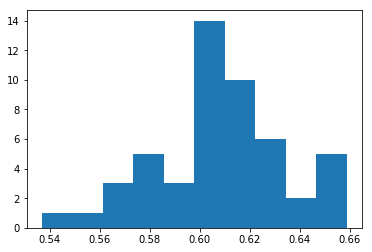

In [142]:
MC1 = monte_carlo_estimator(N=1000,k=50,u1=0.8,u2=3)
est_list,var,err = MC1.estimate(1)
plt.hist(est_list)
var1 = np.var(est_list)
print("Average of estimates: "+str(np.mean(est_list)))
print("Variance is: "+str(var1))

(array([  2.,   1.,   0.,   3.,  10.,  17.,  31.,  89., 100., 147., 153.,
        140., 105.,  93.,  49.,  35.,  16.,   7.,   1.,   1.]),
 array([0.48659898, 0.49803371, 0.50946844, 0.52090317, 0.5323379 ,
        0.54377263, 0.55520736, 0.56664209, 0.57807682, 0.58951155,
        0.60094628, 0.61238101, 0.62381574, 0.63525047, 0.6466852 ,
        0.65811993, 0.66955466, 0.68098939, 0.69242412, 0.70385885,
        0.71529358]),
 <a list of 20 Patch objects>)

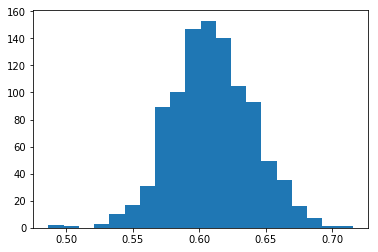

In [82]:
plt.hist(est_list,bins=20)

In [163]:
np.mean(err) #the mean error: how close it is to the integral. It is directly proportional to variance.

0.0009766137127001765


Average of estimates: 3.29944452885346
Variance is: 0.06650336343320551


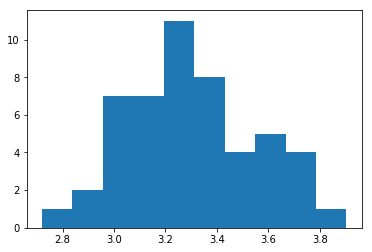

In [155]:
MC2 = monte_carlo_estimator(N=1000,k=50,u1=-np.pi,u2=np.pi)
est_list2,var,err = MC2.estimate(2)
plt.hist(est_list2)
var2 = np.var(est_list2)

print("Average of estimates: "+str(np.mean(est_list2)))
print("Variance is: "+str(var2))

### With stratification

Text(0.5,1,'Inv([1+sinh(2x)ln(x)])')

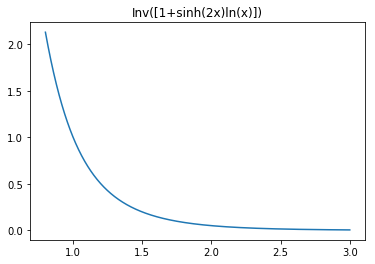

In [102]:
#Visualizing the functions:
MC2 = monte_carlo_estimator(1000,50,0.8,3)
x_ax = np.linspace(0.8,3,1000)
y_ax = []
for num in x_ax:
    y_ax.append(MC2.fx(1,num))
plt.plot(x_ax,y_ax)
plt.title("Inv([1+sinh(2x)ln(x)])")

Text(0.5,1,'Exp[-x^4 – y^4]')

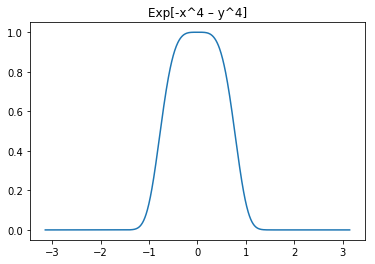

In [135]:
#Visualizing the functions:
MC3 = monte_carlo_estimator(1000,50,0.8,3)
x_ax = np.linspace(-np.pi,np.pi,1000)
x = np.linspace(-np.pi,np.pi,1000)
y = np.linspace(-np.pi,np.pi,1000)
y_ax = []
for i in range(0,len(x)):
    y_ax.append(MC3.fx(2,x[i],y[i]))
plt.plot(x_ax,y_ax)
plt.title("Exp[-x^4 – y^4]")


Average of estimates: 0.6096613732143173
Variance now is: 0.0001752099891480374
Variance has reduced by: 0.00048440477752174926


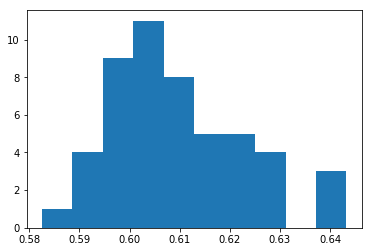

In [150]:
MC41 = monte_carlo_estimator(800,50,0.8,1.4)
est_list41,var,err = MC41.estimate(1)
MC42 = monte_carlo_estimator(200,50,1.4,3)
est_list42,var,err = MC42.estimate(1)
est_list4 = np.array(est_list41) + np.array(est_list42)
plt.hist(est_list4)
var4 = np.var(est_list4)
print("Average of estimates: "+str(np.mean(est_list4)))
print("Variance now is: "+str(var4))
print("Variance has reduced by: "+str(var1-var4))


Average of estimates: 0.6057725870034755
Variance now is: 8.096948027391965e-05
Variance has reduced by: 0.000578645286395867


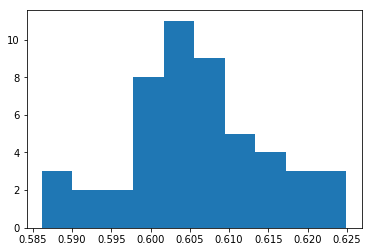

In [172]:
MC41 = monte_carlo_estimator(700,50,0.8,1.25)
est_list41,var,err = MC41.estimate(1)
MC42 = monte_carlo_estimator(200,50,1.25,1.8)
est_list42,var,err = MC42.estimate(1)
MC43 = monte_carlo_estimator(100,50,1.8,3)
est_list43,var,err = MC43.estimate(1)
est_list4 = np.array(est_list41) + np.array(est_list42) + np.array(est_list43)
plt.hist(est_list4)
var4 = np.var(est_list4)
print("Average of estimates: "+str(np.mean(est_list4)))
print("Variance now is: "+str(var4))
print("Variance has reduced by: "+str(var1-var4))


Average of estimates: 3.268409582290208
Variance now is: 0.010744134206638209
Variance has reduced by: 0.0557592292265673


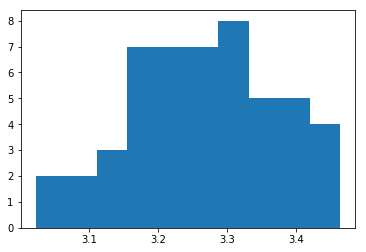

In [171]:
MC51 = monte_carlo_estimator(800,50,-1.35,1.35)
est_list51,var,err = MC51.estimate(2)
MC52 = monte_carlo_estimator(100,50,-np.pi,-1.35)
est_list52,var,err = MC52.estimate(2)
MC53 = monte_carlo_estimator(100,50,1.35,np.pi)
est_list53,var,err = MC53.estimate(2)

est_list5 = np.array(est_list51) + np.array(est_list52) + np.array(est_list53)
plt.hist(est_list5)
var5 = np.var(est_list5)
print("Average of estimates: "+str(np.mean(est_list5)))
print("Variance now is: "+str(var5))
print("Variance has reduced by: "+str(var2-var5))

### With importance sampling

In [383]:
from scipy.stats import truncnorm

def gx(x,y):
    '''A = 1
    lamda = 1
    mu = 1
    sigma = 0
    phi=0
    return ((1/(2*np.pi*np.sqrt(1-np.square(phi))))*np.exp((-(1/(2*(1-np.square(phi)))))*(np.square(x)-(2*np.pi*x*y)+np.square(y))))
    #return (1/(2*np.pi*np.sqrt(1-np.square(phi))))
    #return truncnorm.pdf(x, 0.8, 3)
    #z = (1/(np.sqrt(2*np.pi)))*np.exp(-0.5*np.square(x))
    #return (A*np.exp(-lamda*x)'''
    return (np.tanh(x)+np.cos(y))

Text(0.5,1,'Blue -> f(x). Orange -> g(x)')

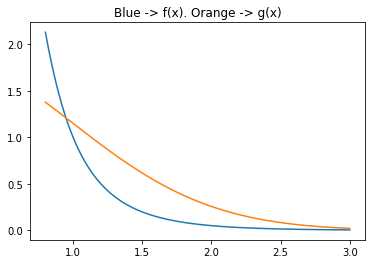

In [354]:
#Visualizing the functions:
MC2 = monte_carlo_estimator(1000,50,0.8,3)
x_ax = np.linspace(0.8,3,1000)
y_ax = []
y_ax2 = []
for num in x_ax:
    y_ax.append(MC2.fx(1,num))
for num in x_ax:
    y_ax2.append(gx(num))
plt.figure(1)
plt.plot(x_ax,y_ax)
plt.plot(x_ax,y_ax2)
plt.title("Blue -> f(x). Orange -> g(x)")

Text(0.5,1,'Blue -> f(x). Orange -> g(x)')

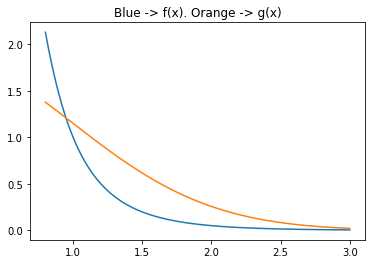

In [355]:
#Visualizing the functions:
MC2 = monte_carlo_estimator(1000,50,0.8,3)
x_ax = np.linspace(0.8,3,1000)
y_ax = []
y_ax2 = []
for num in x_ax:
    y_ax.append(MC2.fx(1,num))
for num in x_ax:
    y_ax2.append(gx(num))
plt.figure(1)
plt.plot(x_ax,y_ax)
plt.plot(x_ax,y_ax2)
plt.title("Blue -> f(x). Orange -> g(x)")

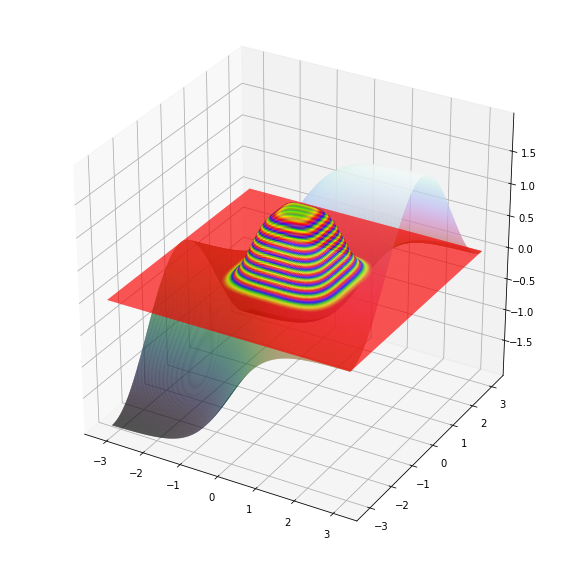

In [385]:
MC4 = monte_carlo_estimator(500,50,-np.pi,np.pi)
x_ax = np.linspace(-np.pi,np.pi,500)
x = np.linspace(-np.pi,np.pi,500)
y = np.linspace(-np.pi,np.pi,500)
X, Y = np.meshgrid(x, y)
Z = fx2(X, Y)
R = gx(X,Y)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='prism')
ax.plot_surface(X, Y, R, rstride=1, cstride=1,cmap='cubehelix')

C:\Users\royma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

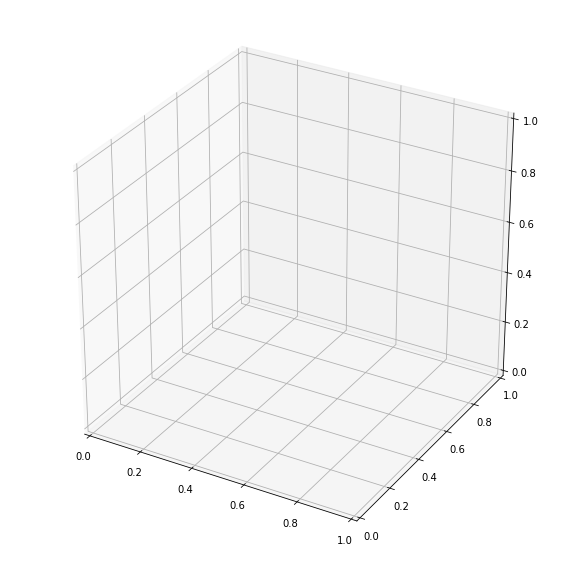

In [395]:
def gx2(x,y):
    A = 100
    return (np.exp(x)*np.square(y) + 2*np.sqrt(x*np.sin(y)))

x_ax = np.linspace(-np.pi,np.pi,500)
x = np.linspace(-np.pi,np.pi,500)
y = np.linspace(-np.pi,np.pi,500)
X, Y = np.meshgrid(x, y)
#Z = fx2(X, Y)
R = gx2(X,Y)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
#ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='gist_earth')
ax.plot_surface(X, Y, R, rstride=1, cstride=1,cmap='hot')


Average of estimates: 0.6074807229193763
Variance is: 0.00017418938267099344
Variance has reduced by: 0.0006076367280693608


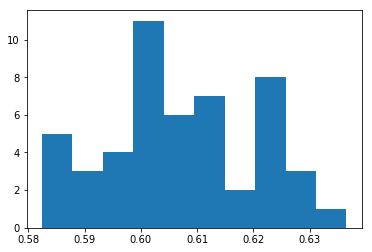

In [288]:
MC7 = monte_carlo_estimator_v2(N=1000,k=50,u1=0.8,u2=3)
est_list8,var,err = MC7.estimate(1)
plt.hist(est_list8)
var8 = np.var(est_list8)
print("Average of estimates: "+str(np.mean(est_list8)))
print("Variance is: "+str(var8))
print("Variance has reduced by: "+str(var1-var8))

#### For second function


Average of estimates: 3.2655396520193882
Variance is: 0.0873342867686938


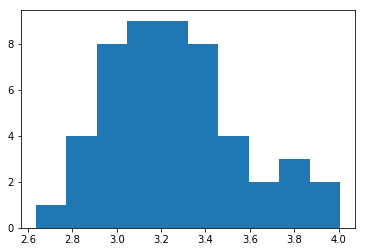

In [350]:
MC2 = monte_carlo_estimator(N=1000,k=50,u1=-np.pi,u2=np.pi)
est_list2,var,err = MC2.estimate(2)
plt.hist(est_list2)
var2 = np.var(est_list2)

print("Average of estimates: "+str(np.mean(est_list2)))
print("Variance is: "+str(var2))

In [338]:
np.shape(y)

(1000,)

### Testing out on an integral

In [368]:
def fx3(a,b):
    return (20 + np.square(a) + np.square(b) - (10 * (np.cos(2*np.pi*a) + np.cos(2*np.pi*b))))

def fx2(x,y):
    return ((np.exp(-(x**4)-(y**4))))

Text(0.5,1,'f(x)')

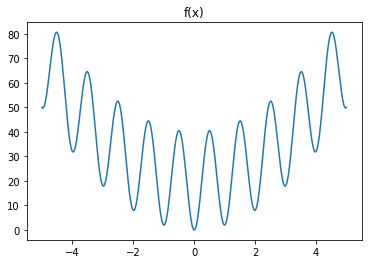

In [186]:
#Visualizing the functions:
MC6 = monte_carlo_estimator_v2(1000,50,-5,5)
x_ax = np.linspace(-5,5,1000)
x = np.linspace(-5,5,1000)
y = np.linspace(-5,5,1000)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
y_ax = []
for i in range(0,len(x)):
    y_ax.append(MC6.fx(3,x[i],y[i]))
plt.plot(x_ax,y_ax)
plt.title("f(x)")

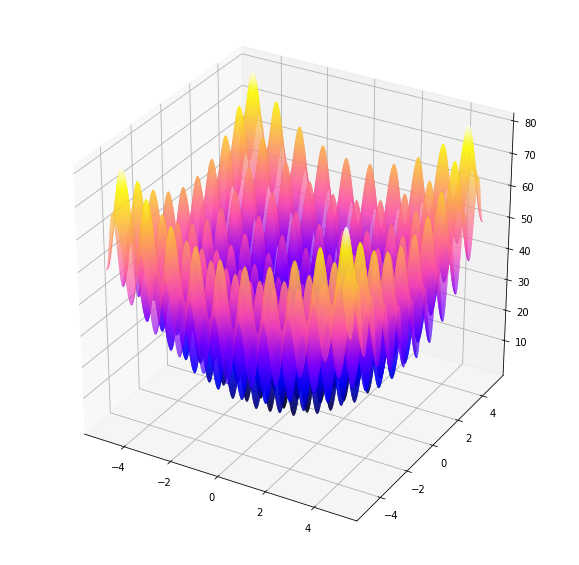

In [367]:
#Visualizing the functions:
MC6 = monte_carlo_estimator_v2(1000,50,-5,5)
x_ax = np.linspace(-5,5,1000)
x = np.linspace(-5,5,1000)
y = np.linspace(-5,5,1000)
X, Y = np.meshgrid(x, y)
Z = fx3(X, Y)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='gnuplot2')



Average of estimates: 3663.6798930856753
Variance is: 2612.8931129964985


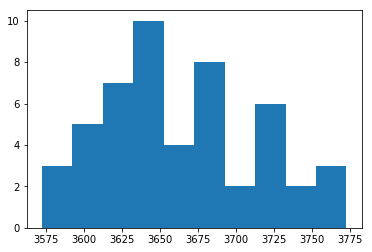

In [291]:
MC2 = monte_carlo_estimator_v4(N=1000,k=50,u1=-5,u2=5)
est_list2,var,err = MC2.estimate(3)
plt.hist(est_list2)
var2 = np.var(est_list2)

print("Average of estimates: "+str(np.mean(est_list2)))
print("Variance is: "+str(var2))

## Discussion:

The results for each experiment have been summarized below.<br>

Crude Monte Carlo:
function 1: <br>
Average of estimates: 0.6084080967465829 <br>
Variance is: 0.0006596147666697867<br>

function 2: <br>
Average of estimates: 3.299444528853461<br>
Variance is: 0.0665033634332055<br>

Stratification: <br>
function 1:<br>
Average of estimates: 0.6096613732143173<br>
Variance now is: 0.0001752099891480374<br>
Variance has reduced by: 0.00048440477752174926<br>
<br>

More segments:<br>

Average of estimates: 0.6057725870034755<br>
Variance now is: 8.096948027391965e-05<br>
Variance has reduced by: 0.000578645286395867<br>

function 2:<br>
Average of estimates: 3.268409582290208<br>
Variance now is: 0.010744134206638209<br>
Variance has reduced by: 0.0557592292265673<br>

Importance Sampling:<br>
function 1:<br>
Average of estimates: 0.6074807229193763<br>
Variance is: 0.00017418938267099344<br>
Variance has reduced by: 0.0006076367280693608<br>

function 2:<br>
Average of estimates: 3.2655396520193882<br>
Variance is: 0.0873342867686938<br>

Function 3: Testing the integrand:<br>
Average of estimates: 3663.6798930856753<br>
Variance is: 2612.8931129964985<br>

> Stratified sampling 

- Stratified sampling is used to allocate more samples to regions of the integrand where there is more area
- This ensures that samples are distributed proportionately

Importance: <br>
- Variance reduction is effective
- A more stable value of the estimate is obtained
- If the analytical value is not convenient to find, like in importance sampling, then the simple sampling value can be used
- Computationally simpler than importance sampling

Limitations: <br>
1. In a function like f3(x), it is hard to decide manually which areas need more concentration. Automation in such a case is hard to design.
2. It does not give importance to the likelihood of the power of the function 
3. While dividing the samples, the randomness gets divided and might violate the property of it being sampled from a uniform distribution.

> Importance Sampling

Importance sampling is used to allocate samples to regions where the likelihood of the power of the function is more. <br>

Importance: <br>
1. Converges for all values of g(x) as long as support (g) is greater than support (f)
2. G is realtively easier to sample
3. While the mean is unbiased, it can be shown that it has smaller MSE
4. Effective variance reduction
5. A more stable value of the estimate is obtained

Limitations: <br>
1. All values that appear in f(x) must appear in g(x). If the shape of the distribution is non parametric, it is hard to obtain such a function
2. g(x) failing the conditions such as integral should be 1 would result in a systematic error.

> Discussion

1. In crude Monte Carlo method, we obtain a good estimate of the integral. The only problem is the variance which corresponds to the error.
2. Higher the variance, higher the error
3. If the function is relatively simple geometrically, we can use two of many variance reduction techniques: importance sampling and stratified sampling
4. When stratified sampling is used, the variance reduces by a small amount (in the same range) as indicated in the results above.
5. When importance sampling is used, the reduction in variance is relatively more (down by the range of 10e-1) 
6. For stratified sampling, for the first function, we divide it into 3 segments: giving more importance from 0.8 to 1.4 range.
7. We see that by dividing into more segments with a reasonably correct allocation of samples, we get further reduction in variance.
8. For the second function, we see that the range -1.3 to 1.3 with the right amount of samples gives a better approximate than the crude method with reduced variance.
9. In importance sampling, for the first function, we can use the following distribution: negative exponential, log normal and truncated normal for g(x)
10. For the second function, we use bivariate normal thresholded to the range of -pi to pi
11. For the test integrand, importance sampling makes it hard to determine g(x) while stratified makes it hard to localize the areas of most importance. Therefore, we use crude monte carlo.
12. Since the variance is a lot, on further analysis, we can use stratified monte carlo sampling. 